In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
selected_episode_index = 435 
csv_output_path = 'C:\\Users\\Asus\\OneDrive - Chulalongkorn University\\Desktop\\Senior Project\\Experiments-with-DQN-Onnut-27042022\\Experiments-with-DQN-Onnut-21042022\\multi-agent-dqn-main\\output_500episodes_04052022\\outputs'

file_path = os.path.join(csv_output_path,'onnut-dqn_run{}.csv'.format(selected_episode_index))

selected_episode_df = pd.read_csv(file_path)

onnut_action = selected_episode_df['onnut_action'].to_list()
virtual_action = selected_episode_df['virtual_action'].to_list()

In [3]:
police_csv_output_path = 'C:\\Users\\Asus\\OneDrive - Chulalongkorn University\Desktop\\Senior Project\\Experiments-with-DQN-Onnut-27042022\\Experiments-with-DQN-Onnut-21042022\\multi-agent-dqn-main\\tuned_police_499episodes\\tuned_police'

police_file_path = os.path.join(police_csv_output_path,'tuned_police_output_run0.csv')

police_df = pd.read_csv(police_file_path)
police_df

,Unnamed: 0,action_onnut,action_virtual,reward_onnut,reward_virtual,travel_time_onnut,travel_time_virtual,teleport_number
0,0,1,1,0,0,0.695770,0.000000,0
1,1,1,1,9,0,20.858666,0.000000,0
2,2,2,1,5,0,0.577264,0.179800,0
3,3,2,1,0,0,261.632304,489.390586,0
4,4,2,1,1,0,0.064867,0.354716,0
...,...,...,...,...,...,...,...,...
955,955,2,1,95,14,156.510407,301.262553,0
956,956,2,1,77,16,344.888106,8.996333,0
957,957,2,1,70,16,346.013191,21.662546,0
958,958,2,1,95,14,530.220912,16.926457,0


In [4]:
df = selected_episode_df.copy()

df.groupby(['onnut_action','virtual_action']).agg({'reward_onnut':'mean','reward_virtual':'mean'})

reward_onnut  reward_virtual
onnut_action virtual_action                              
0            0                  85.748252       23.216783
             1                  98.500000       26.333333
             2                  85.587719       23.526316
1            0                  97.738372       24.037791
             1                  96.647059       26.117647
             2                  93.762611       22.792285

In [5]:
df.groupby(['onnut_action','virtual_action'])[['reward_onnut','reward_virtual','total_travel_time_onnut','total_travel_time_virtual']].mean().reset_index()

,onnut_action,virtual_action,reward_onnut,reward_virtual,total_travel_time_onnut,total_travel_time_virtual
0,0,0,85.748252,23.216783,279.836390,326.470250
1,0,1,98.500000,26.333333,82.760489,31.505414
2,0,2,85.587719,23.526316,369.255681,136.432483
3,1,0,97.738372,24.037791,428.805678,292.065787
4,1,1,96.647059,26.117647,1552.345277,145.545155
5,1,2,93.762611,22.792285,590.835161,223.155465


In [6]:
summary_value_df = df.groupby(['onnut_action','virtual_action'])[['reward_onnut','reward_virtual','total_travel_time_onnut','total_travel_time_virtual']].mean().reset_index()

In [7]:
police_onnut_phase2_df = police_df.groupby(['action_onnut','action_virtual'])['Unnamed: 0'].count().reset_index()
# onnut_phase2_df = onnut_phase2_df[onnut_phase2_df['onnut_action']==1]

police_onnut_phase2_df.rename({'Unnamed: 0':'count'},axis=1)


,action_onnut,action_virtual,count
0,1,1,302
1,1,3,114
2,2,1,544


In [44]:
onnut_phase_df = df.groupby(['onnut_action','virtual_action'])['step_time'].count().reset_index()
# onnut_phase2_df = onnut_phase2_df[onnut_phase2_df['onnut_action']==1]

onnut_phase_df.rename({'step_time':'count'})


,onnut_action,virtual_action,step_time
0,0,0,143
1,0,1,6
2,0,2,114
3,1,0,344
4,1,1,17
5,1,2,337


In [45]:
onnut_phase1_df = pd.DataFrame({'Virtual phase1':[302,143],'Virtual phase2':[0,6],'Virtual phase3':[114,114]},index=['Police Strategy','Reinforcement \n Learning'])
onnut_phase1_df

,Virtual phase1,Virtual phase2,Virtual phase3
Police Strategy,302,0,114
Reinforcement \n Learning,143,6,114


<AxesSubplot:xlabel='Virtual phase1,Virtual phase2,Virtual phase3'>

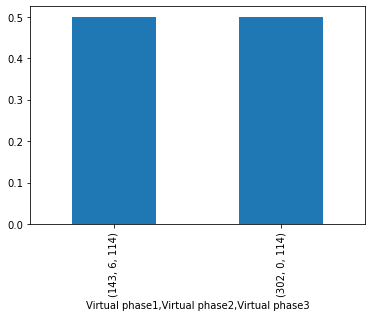

In [51]:
# onnut_phase1_df.value_counts(normalize=True).plot.bar(stacked=True)

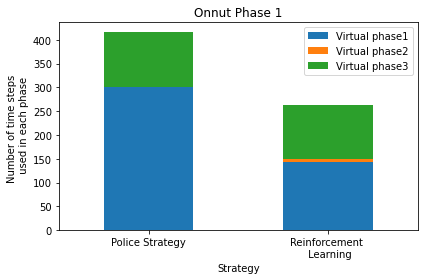

In [52]:
ax = onnut_phase1_df.plot(kind='bar', stacked=True,rot=0)
# for c in ax.containers:

#     # Optional: if the segment is small or 0, customize the labels
#     labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
#     # remove the labels parameter if it's not needed for customized labels
#     plt.bar_label(c, labels=labels, label_type='center')

plt.xlabel('Strategy')
plt.ylabel('Number of time steps \n used in each phase')
plt.legend(bbox_to_anchor=(1, 1))
 
# title of plot
plt.title('Onnut Phase 1')
plt.tight_layout()
# plt.savefig('onnut_junction_compare.png')

In [37]:
onnut_action_df = pd.DataFrame({'Onnut phase1':[416,263],'Onnut phase2':[544,698]},index=['Police Strategy','Reinforcement \n Learning'])
onnut_action_df

,Onnut phase1,Onnut phase2
Police Strategy,416,544
Reinforcement \n Learning,263,698


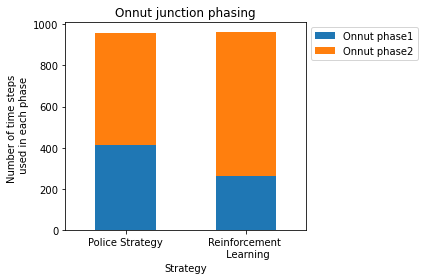

In [38]:
ax = onnut_action_df.plot(kind='bar', stacked=True,rot=0)
# for c in ax.containers:

#     # Optional: if the segment is small or 0, customize the labels
#     labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
#     # remove the labels parameter if it's not needed for customized labels
#     plt.bar_label(c, labels=labels, label_type='center')

plt.xlabel('Strategy')
plt.ylabel('Number of time steps \n used in each phase')
plt.legend(bbox_to_anchor=(1, 1))
 
# title of plot
plt.title('Onnut junction phasing')
plt.tight_layout()
plt.savefig('onnut_junction_compare.png')

In [39]:
virtual_action_df = pd.DataFrame({'Virtual phase1':[842,487],'Virtual phase2':[0,23],'Virtual phase3':[114,451]},index=['Police Strategy','Reinforcement \n Learning'])
virtual_action_df

,Virtual phase1,Virtual phase2,Virtual phase3
Police Strategy,842,0,114
Reinforcement \n Learning,487,23,451


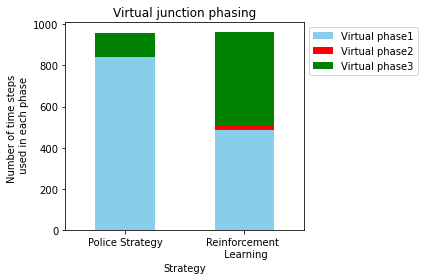

In [40]:
ax = virtual_action_df.plot(kind='bar', stacked=True,rot=0, color=['skyblue', 'red', 'green'])
# for c in ax.containers:

#     # Optional: if the segment is small or 0, customize the labels
#     labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
#     # remove the labels parameter if it's not needed for customized labels
#     plt.bar_label(c, labels=labels, label_type='center')

plt.xlabel('Strategy')
plt.ylabel('Number of time steps \n used in each phase')
plt.legend(bbox_to_anchor=(1, 1))
 
# title of plot
plt.title('Virtual junction phasing')
plt.tight_layout()
plt.savefig('virtual_junction_compare.png')

C:\Users\Asus\AppData\Local\Temp\ipykernel_9876\848509539.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_onnut_phase2['virtual_action_fix'] = df_only_onnut_phase2['virtual_action'] + 1


<AxesSubplot:xlabel='virtual_action_fix', ylabel='count'>

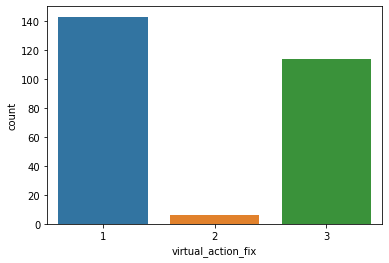

In [13]:
#observe when onnut junction (RL) open phase 2 
#count plot 

df_only_onnut_phase2 = df[df['onnut_action']== 0]
df_only_onnut_phase2['virtual_action_fix'] = df_only_onnut_phase2['virtual_action'] + 1
sns.countplot(data=df_only_onnut_phase2,x='virtual_action_fix')

C:\Users\Asus\AppData\Local\Temp\ipykernel_9876\3634734577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_value_onnut_phase2_df['virtual_action_fix'] = summary_value_onnut_phase2_df['virtual_action'] + 1


<AxesSubplot:xlabel='virtual_action_fix', ylabel='total_travel_time_onnut'>

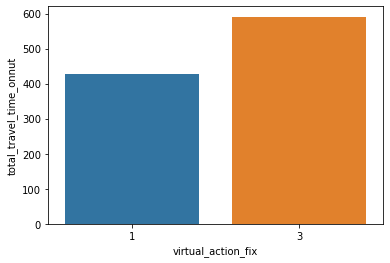

In [14]:
#calculate value when onnut phase 2

summary_value_onnut_phase2_df = summary_value_df[summary_value_df['onnut_action']==1]
summary_value_onnut_phase2_df['virtual_action_fix'] = summary_value_onnut_phase2_df['virtual_action'] + 1

df_clear  = summary_value_onnut_phase2_df[summary_value_onnut_phase2_df['virtual_action_fix']!=2]

# sns.barplot(data=summary_value_onnut_phase2_df,x='virtual_action_fix',y='total_travel_time_onnut')
sns.barplot(data=df_clear,x='virtual_action_fix',y='total_travel_time_onnut') 

C:\Users\Asus\AppData\Local\Temp\ipykernel_9876\2018593064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_value_onnut_phase2_df['virtual_action_fix'] = summary_value_onnut_phase2_df['virtual_action'] + 1


<AxesSubplot:xlabel='virtual_action_fix', ylabel='total_travel_time_virtual'>

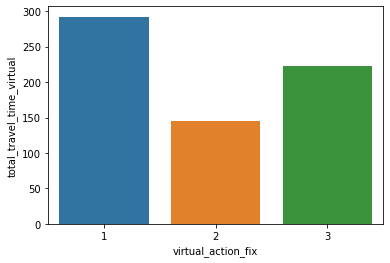

In [15]:
#calculate value when onnut phase 2

summary_value_onnut_phase2_df = summary_value_df[summary_value_df['onnut_action']==1]
summary_value_onnut_phase2_df['virtual_action_fix'] = summary_value_onnut_phase2_df['virtual_action'] + 1

sns.barplot(data=summary_value_onnut_phase2_df,x='virtual_action_fix',y='total_travel_time_virtual') # <- travel